## Installing dependencies

 - Have python3 running on your machine
 - Create a virtual environment `python3 -m venv venv` in your current working directory
 - Enter the virtual environment `source .venv/bin/activate`, run `pip install -r requirements.txt` to install all dependencies

----



In [1]:
import pandas as pd
import numpy as np
import matplot as mp
import random
import json
from collections import defaultdict
from collections import Counter
# 60 sec * 90 min = 5400 secs 
# 5400 / 30 (30s per tick)
simulation_tick = 180 
teams = []

import matplotlib.pyplot as plt

## Question 1: Temperature Modeling

Consider a scenario where the temperature X(t) varies randomly over a continuous time interval t, where t is in the range from 0 to 1. We begin with the assumption that X(0) = 0, which means that the temperature at time 0 is 0. Now, if we choose a small time increment represented by ∆t, we can make the assumption that the change in temperature from time t to t + ∆t, denoted as X(t+ ∆t)− X(t), follows a normal distribution. This normal distribution is characterized by a mean of 0 and a variance of ∆t.

1. Let $P$ be the random variable denoting the proportion of time in [0, 1] such that the temperature is positive. Estimate the distribution of $P$ by Monte Carlo simulation and experimenting with various values of ∆t (e.g. ∆t = 0.01, 0.001, 0.0001, · · · .)
2. Let $T_{max}$ be the random variable denoting the time in [0, 1] such that the temperature is at its maximum. Estimate the distribution of $T_{max}$ by Monte Carlo simulation and experimenting with various values of ∆t (e.g. ∆t = 0.01, 0.001, 0.0001, · · · .)

We will first plot the distribution estimate for $P$ when $∆t = 0.01$. We will pick the number of simulations to be 1000. Since the temperature change from some time $t$ to $t + ∆t$ is normally distributed, within each simulation we will sample $1/∆t$ values from a normal distribution with 0 mean and $\sqrt∆t$ standard deviation. Then, starting from time 0 and temperature 0, we will add the temperature changes one by one, and for each change record whether the current temperature is positive or not.

In [ ]:
# Parameters we can choose

deltaT = 0.01
num_simulations = 1000

Formally, for $n=\frac{1}{\Delta t}$ samples $\left\{ s_1, s_2, \dots, s_n \right\}$, we define the proportion of positive temperatures $p$ as
$p=\frac{1}{n}\sum_{k=1}^{n}\textbf{1}_\mathbb{R^+}\left( \sum_{i=1}^{k} s_i \right)$, where $\textbf{1}_\mathbb{R^+}$ is the indicator function of the set of positive reals, defined as
$$
\textbf{1}_\mathbb{R^+}(x) =
\begin{cases}
1 & \text{if } x \in R^+, \\
0 & \text{if } x \notin R^+.
\end{cases}
$$

In [ ]:
def get_positive_proportion(arr):
    num = cur = 0
    for t in arr:
        cur += t
        num += int(cur > 0)
    return num / arr.shape[0]

def get_P(deltaT, num_simulations=1000):
    num_temp_changes = int(1 / deltaT)
    temp_changes = np.random.normal(0, np.sqrt(deltaT), (num_simulations, num_temp_changes))
    return np.array(list(map(get_positive_proportion, temp_changes)))

Finally, we plot the computed values of $\left\{ p_1, p_2, \dots, p_m \right\}$ where $m$ is the number of simulations performed ($m=1000$ in our case).

Text(0, 0.5, 'Frequency')

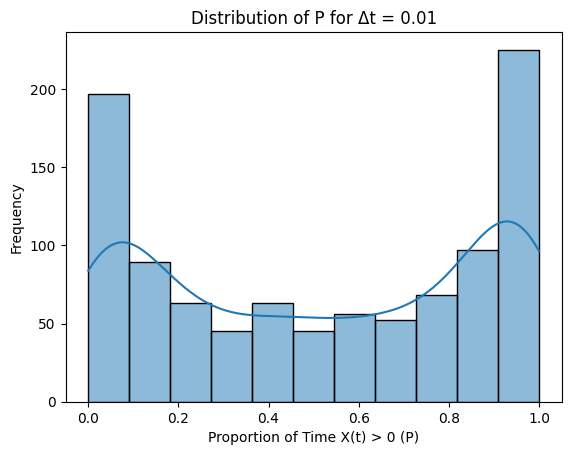

In [ ]:
proportions = get_P(deltaT, num_simulations)
sns.histplot(proportions, kde=True)
plt.title(f'Distribution of P for Δt = {deltaT}')
plt.xlabel('Proportion of Time X(t) > 0 (P)')
plt.ylabel('Frequency')

Next step is to plot the distribution estimates for $\Delta t = 0.01, 0.001, 0.0001, 0.00001$.

In [ ]:
deltaTs = [0.01, 0.001, 0.0001, 0.00001]
P_values = [get_P(delta_t) for delta_t in deltaTs]

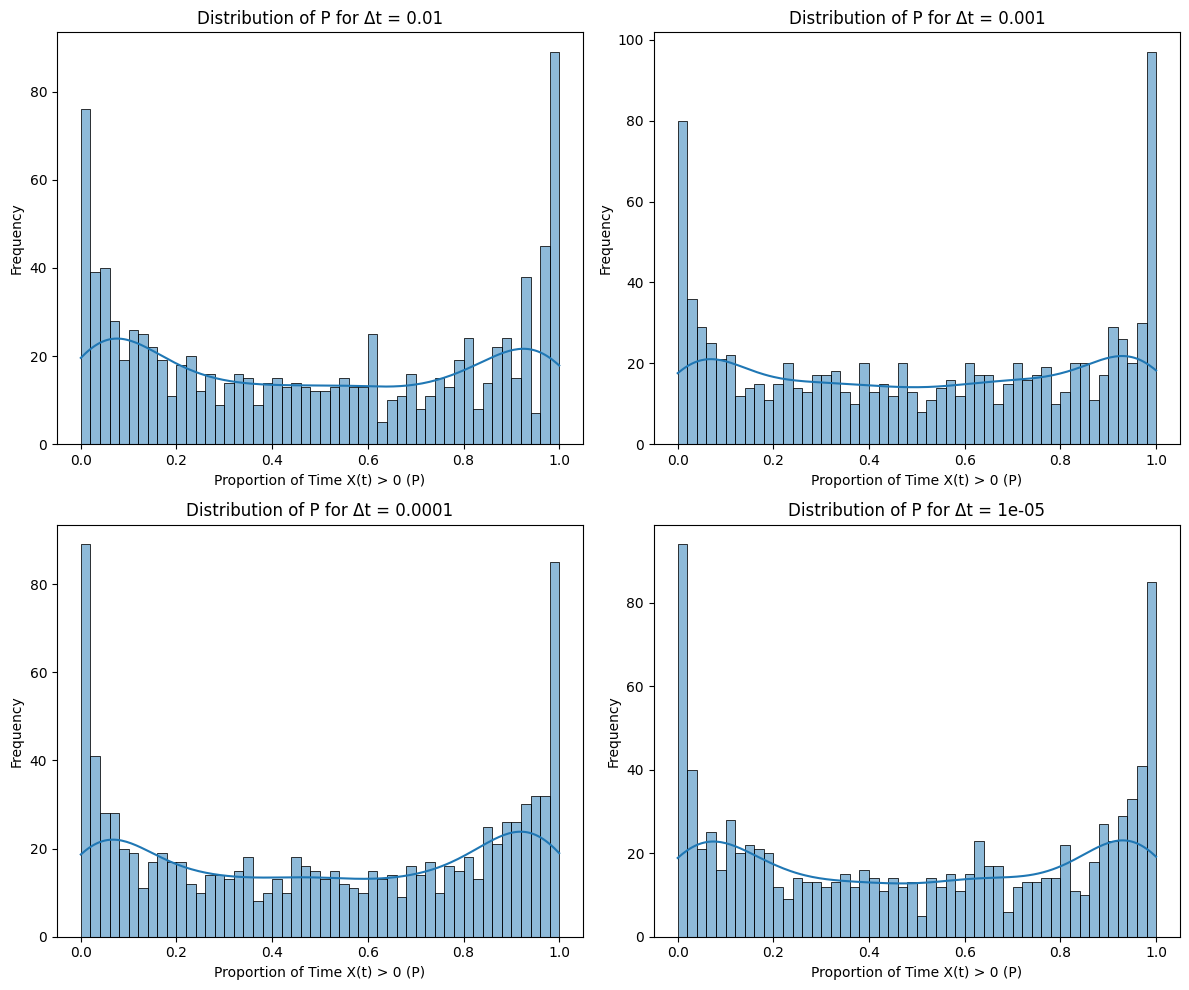

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, P_value in enumerate(P_values):
    sns.histplot(P_value, kde=True, bins=50, ax=axes[idx])
    axes[idx].set_title(f'Distribution of P for Δt = {deltaTs[idx]}')
    axes[idx].set_xlabel('Proportion of Time X(t) > 0 (P)')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The following table contains mean and variance estimates for value of $\Delta t$.

In [ ]:
means = [p.mean() for p in P_values]
vars = [p.var() for p in P_values]
dist_df = pd.DataFrame(list(zip(deltaTs, means, vars)), columns=['Δt', 'Mean', 'Variance'])
dist_df

,Δt,Mean,Variance
0,0.01000,0.485990,0.124607
1,0.00100,0.506686,0.119033
2,0.00010,0.507017,0.124882
3,0.00001,0.500387,0.125853


Now we turn to estimating the distribution of $T_{max}$. Similarly to $P$, The time at which the temperature is at its maximum can be defined as $t_{max}=\frac{1}{n}\underset{k \in S}{\argmax} \left( \sum_{i=1}^{k} s_i \right)$ where $n=\frac{1}{\Delta t}$, $\left\{ s_1, s_2, \dots, s_n \right\}$ are the temperature change samples and $S=\left\{ x \in \mathbb{N} \mid x \le n \right\}$.

In [ ]:
def get_max(arr):
    max_val = max_ind = cur = 0
    for i in range(arr.shape[0]):
        cur += arr[i]
        max_val = max(max_val, cur)
        max_ind = i if max_val == cur else max_ind

    return max_ind / arr.shape[0]

def get_Tmax(deltaT, num_simulations=1000):
    num_temp_changes = int(1 / deltaT)
    temp_changes = np.random.normal(0, np.sqrt(deltaT), (num_simulations, num_temp_changes))
    return np.array(list(map(get_max, temp_changes)))

In [ ]:
Tmax_values = [get_Tmax(delta_t) for delta_t in deltaTs]

The following are the distribution estimates for $T_{max}$ when $\Delta t = 0.01, 0.001, 0.0001, 0.00001$.

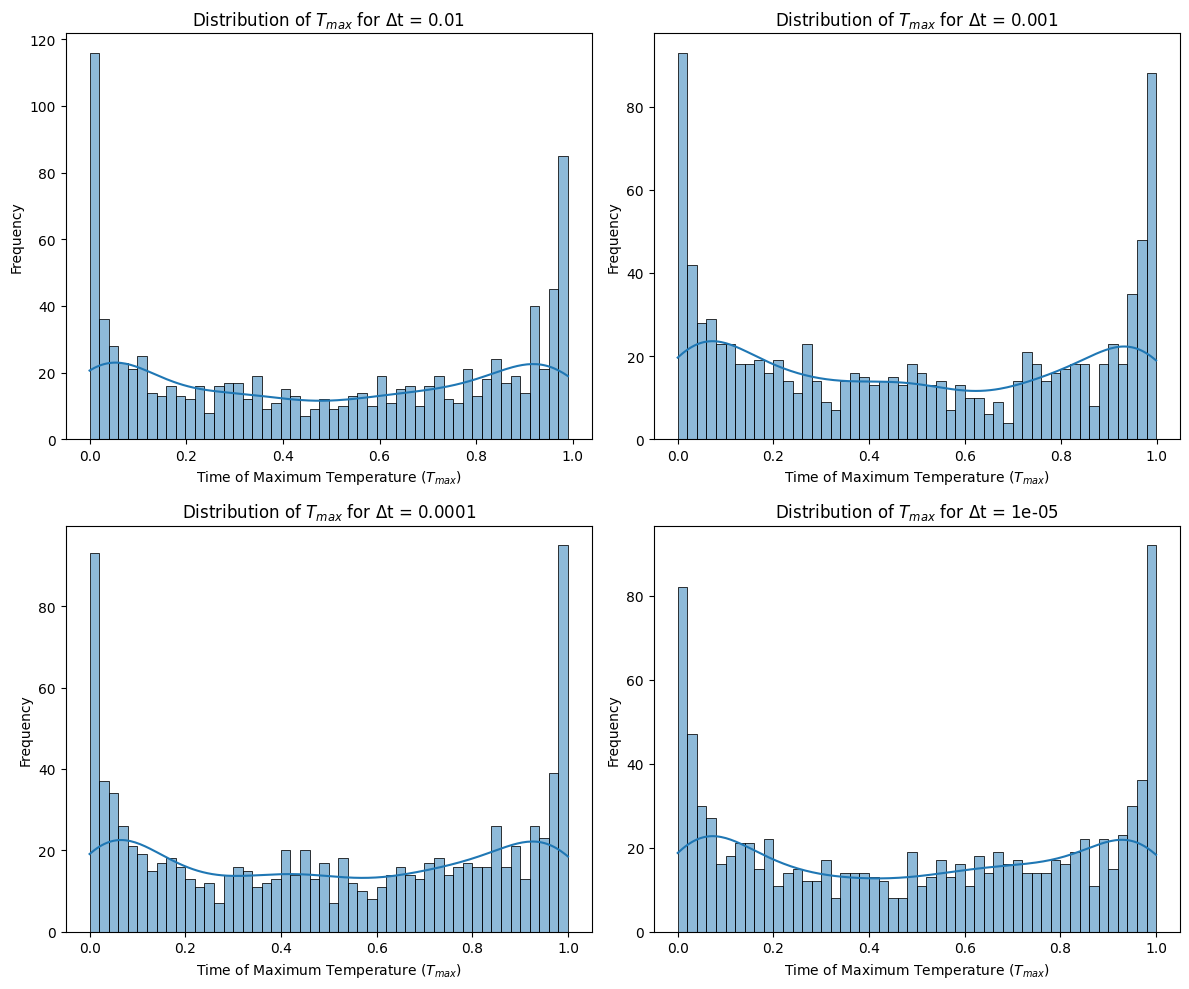

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, Tmax_value in enumerate(Tmax_values):
    sns.histplot(Tmax_value, kde=True, bins=50, ax=axes[idx])
    axes[idx].set_title(f'Distribution of $T_{{max}}$ for Δt = {deltaTs[idx]}')
    axes[idx].set_xlabel('Time of Maximum Temperature ($T_{max}$)')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The following table contains mean and variance estimates for value of $\Delta t$.

In [ ]:
means = [t.mean() for t in Tmax_values]
vars = [t.var() for t in Tmax_values]
dist_df = pd.DataFrame(list(zip(deltaTs, means, vars)), columns=['Δt', 'Mean', 'Variance'])
dist_df

,Δt,Mean,Variance
0,0.01000,0.490810,0.128790
1,0.00100,0.489430,0.127302
2,0.00010,0.501858,0.124305
3,0.00001,0.501008,0.123100


### Analysis of Results

Distribution estimates of $P$ and $T_{max}$ seem to suggest that both random variables have identical distributions, with $\mu \approx 0.5$ and $\sigma^2 \approx 0.125$. A notable characteristic of both distributions are the heavy tails at 0 and 1. Simulating how the temperature changes over time for a few samples, we notice that some paths keep hovering over 0, shifting from positive to negative and negative and positive values. However, a good portion of paths start with a wave of positive/negative changes, and thus never go down/up to 0. These samples will have either $t_{max}=p=0$ (negative values at start) or $t_{max}=p=1.0$ (positive values at start).

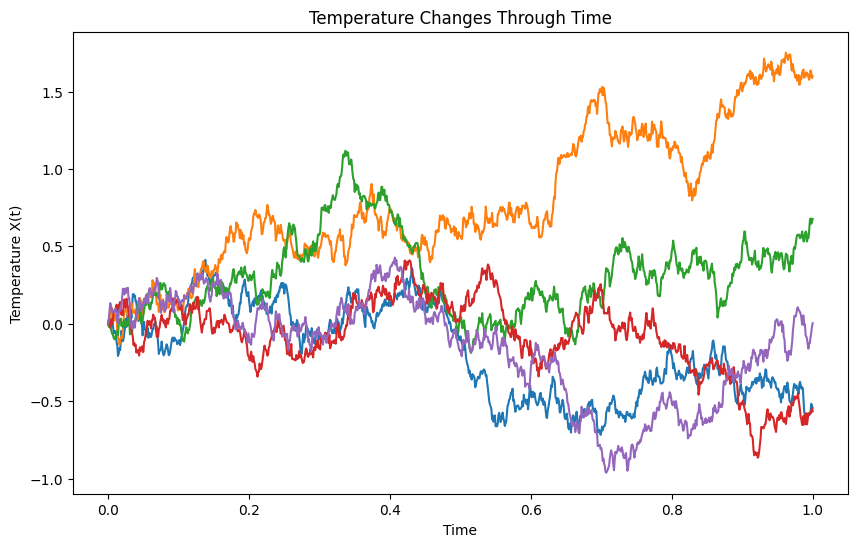

In [ ]:
def simulate_change(delta_t):
    N_steps = int(1 / delta_t)
    dX = np.random.normal(0, np.sqrt(delta_t), size=N_steps)
    X = np.concatenate(([0], np.cumsum(dX)))
    time_grid = np.linspace(0, 1, N_steps + 1)
    return time_grid, X

delta_t = 0.001
num_paths = 5
plt.figure(figsize=(10, 6))

for _ in range(num_paths):
    t, X = simulate_change(delta_t)
    plt.plot(t, X)

plt.title('Temperature Changes Through Time')
plt.xlabel('Time')
plt.ylabel('Temperature X(t)')
plt.show()


# Question 2: Premier League Forecasting

Create a probabilistic model and perform Monte Carlo simulations to forecast the final points for Premier League teams in the 2024-2025 season. 

This model will include some unknown parameters that you will determine based on the data you gather. 

In Premier League matches, teams earn three points for a win, one point for a draw, and no points for a loss. For your predictions, you could use statistics from the beginning of the season up to a specific date to estimate the parameters of your model, and then run Monte Carlo simulations to project the outcomes of the remaining matches, ultimately predicting the final points for each team at the season's end. 

----

Here's a brief outline of a relatively straightforward way to model this scenario. 

For each match, you can treat the number of shots attempted by the home and away teams as random variables, such as Poisson random variables. The rate parameters of the Poisson distribution will be influenced by the strengths of both teams. Each shot taken will have an associated probability of scoring, which also varies depending on the teams involved. 

You are encouraged to create your own models, but it's essential to explain and justify your choices. Discuss how you determine the parameters and outline the advantages and limitations of the models you select.

-----
## Question 2: Premier League Forecasting:

The script datascraper.py extracts a large quantity of player statistics from the website https://www.fbref.com and returnst to us a *players.json* file that we can use for our predictive model.

The general principle of our simulation is a time based simulation. I.E we start the game off with a random player from the home team (excluding the gk) taking the kick-off. When it is taken he will pass to another random player (excluding the keeper). 

We then simulate the players chances of either passing, shooting, keeping or losing the ball accoring to the data collected and his position in the team. (For example, compared to a defender, a midfielder is more likely to pass the ball to a forward.) 

#### Team Lineup Creation Function:

In [2]:
#Creates an array of the team names!
with open("./teamFormations.json", 'r') as teamFile:
        teamsJSON = json.load(teamFile)
for team in teamsJSON:
    teams.append(team['name'])

In [3]:
class player:
    '''Player Class'''
    
    def __init__(self, name, url, pos, team, isGoalkeeper, mp, starts, gamesPlayedForCurrentTeam, startsForCurrentTeam, 
                 savePercentage, tacklesPG, interceptionsPG, shotsPG, passesPG, progPassesRecievedPG, progCarriesPG ):
        self.name = name
        self.url = url
        self.position = pos
        self.team = team
        self.isGoalkeeper = isGoalkeeper

        #Common stats:
        self.matchesPlayed = mp
        self.starts = starts
        self.gamesPlayedForCurrentTeam = gamesPlayedForCurrentTeam
        self.startsForCurrentTeam = startsForCurrentTeam

        # GK STATS:
        self.savePercentage = savePercentage

        # Outfielder Stats:
        self.tacklesPG = tacklesPG
        self.interceptionsPG = interceptionsPG
        self.shotsPG = shotsPG
        self.passesPG = passesPG
        self.progPassesRecievedPG = progPassesRecievedPG
        self.progCarriesPG = progCarriesPG
    
    def __str__(self):
        return f"[Name: {self.name}"

In [4]:
import os
def optimized_lineup_selection(defenders, midfielders, forwards, goalkeepers, lineup, iterations):
    """
    Optimized method for selecting starting lineup using Monte Carlo simulation.
    
    Key Optimizations:
    - Precompute weights once
    - Use more efficient data structures
    - Minimize repeated computations
    """
    # Precompute weight calculation to avoid repeated computations
    def calculate_weights(players):
        return [
            max(0.001, player['gamesPlayedForCurrentTeam'] / player['startsForCurrentTeam']) 
            if player['startsForCurrentTeam'] > 0 else 0.001 
            for player in players
        ]
    
    # Precompute weights for each position
    defender_weights = calculate_weights(defenders)
    midfielder_weights = calculate_weights(midfielders)
    forward_weights = calculate_weights(forwards)
    goalkeeper_weights = calculate_weights(goalkeepers)
    
    # Initialize selection count tracking
    defender_selection_counts = defaultdict(int)
    midfielder_selection_counts = defaultdict(int)
    forward_selection_counts = defaultdict(int)
    goalkeeper_selection_counts = defaultdict(int)
    
    # Efficient Monte Carlo simulation
    for _ in range(iterations):
        # Use efficient tracking instead of multiple set operations
        used_names = set()
        
        # Optimize player selection with precomputed weights
        def select_players(players, weights, position_count, selection_counts):
            # Filter out already used players
            available_players = [
                (player, weight) for player, weight in zip(players, weights) 
                if player['name'] not in used_names
            ]
            
            # Unzip players and weights
            available_player_list = [p[0] for p in available_players]
            available_weight_list = [p[1] for p in available_players]
            
            # Select players
            selected = random.choices(
                available_player_list, 
                weights=available_weight_list, 
                k=min(len(available_player_list), position_count)
            )
            
            # Update used names and selection counts
            for player in selected:
                used_names.add(player['name'])
                selection_counts[player['name']] += 1
            
            return selected
        
        # Select players for each position
        selected_defenders = select_players(
            defenders, defender_weights, lineup[0], defender_selection_counts
        )
        
        selected_midfielders = select_players(
            midfielders, midfielder_weights, lineup[1], midfielder_selection_counts
        )
        
        selected_forwards = select_players(
            forwards, forward_weights, lineup[2], forward_selection_counts
        )
        
        # Select goalkeeper (always one)
        available_goalkeepers = [
            (gk, weight) for gk, weight in zip(goalkeepers, goalkeeper_weights) 
            if gk['name'] not in used_names
        ]
        
        if available_goalkeepers:
            goalkeeper = random.choices(
                [gk[0] for gk in available_goalkeepers], 
                weights=[gk[1] for gk in available_goalkeepers], 
                k=1
            )[0]
            
            goalkeeper_selection_counts[goalkeeper['name']] += 1
    
    # Return selection counts for each position
    return {
        'defenders': defender_selection_counts,
        'midfielders': midfielder_selection_counts,
        'forwards': forward_selection_counts,
        'goalkeepers': goalkeeper_selection_counts
    }

def predict_starting_lineup(team_name, iterations=100, base_dir="./team_files"):
    """
    Predict the starting lineup for a team using a Monte Carlo simulation.

    Parameters:
        team_name (str): The name of the team to predict the lineup for.
        iterations (int): Number of Monte Carlo iterations.
        base_dir (str): Directory containing team-specific JSON files.

    Returns:
        list: Predicted starting lineup as an array of player objects.
    """
    # Create a safe filename version of the team name
    safe_team_name = ''.join(char for char in team_name if char.isalnum() or char.isspace()).rstrip()
    safe_team_name = safe_team_name.replace(' ', '_')
    
    # Construct the file path for the team's JSON file
    file_path = os.path.join(base_dir, f"{safe_team_name}.json")
    
    # Check if the file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No JSON file found for team {team_name}. Searched at: {file_path}")

    # Read team formations (assuming this file is still in the original location)
    with open("./teamFormations.json", 'r') as formationFile:
        formations = json.load(formationFile)

    # Default formation
    lineup = "4,3,3"
    for formation in formations:
        if formation["name"] == team_name:
            lineup = formation["formation"]

    # Load player data from team-specific file
    with open(file_path, 'r') as file:
        players = json.load(file)

    lineup = list(map(int, lineup.split(",")))

    # Separate players by position
    team_players = [p for p in players]
    defenders = [p for p in players if 'DF' in p['position'].split(', ')]
    midfielders = [p for p in players if 'MF' in p['position'].split(', ')]
    forwards = [p for p in players if 'FW' in p['position'].split(', ')]
    goalkeepers = [p for p in players if 'GK' in p['position'].split(', ')]

    if not goalkeepers:
        raise ValueError(f"No goalkeepers found for team {team_name}")

    # Use the optimized selection method
    selection_results = optimized_lineup_selection(
        defenders, midfielders, forwards, goalkeepers, lineup, iterations
    )

    # Determine the most likely starting lineup
    predicted_defenders = sorted(
        selection_results['defenders'].items(),
        key=lambda x: x[1],
        reverse=True
    )[:lineup[0]]

    predicted_midfielders = sorted(
        selection_results['midfielders'].items(),
        key=lambda x: x[1],
        reverse=True
    )[:lineup[1]]

    predicted_forwards = sorted(
        selection_results['forwards'].items(),
        key=lambda x: x[1],
        reverse=True
    )[:lineup[2]]

    predicted_goalkeeper = max(
        selection_results['goalkeepers'].items(), 
        key=lambda x: x[1]
    )

    # Aggregate all player objects into a single list
    starting_lineup = []
    selected_players = set()

    # Add goalkeeper
    starting_lineup.append(next(player for player in goalkeepers if player['name'] == predicted_goalkeeper[0]))
    selected_players.add(predicted_goalkeeper[0])

    # Add defenders
    for defender in predicted_defenders:
        player = next(player for player in defenders if player['name'] == defender[0])
        starting_lineup.append(player)
        selected_players.add(player['name'])

    # Add midfielders
    for midfielder in predicted_midfielders:
        player = next(player for player in midfielders if player['name'] == midfielder[0])
        starting_lineup.append(player)
        selected_players.add(player['name'])

    # Add forwards
    for forward in predicted_forwards:
        player = next(player for player in forwards if player['name'] == forward[0])
        starting_lineup.append(player)
        selected_players.add(player['name'])

    # Fill remaining gaps for each position
    while len(starting_lineup) < 11:
        remaining_pool = [p for p in team_players if p['name'] not in selected_players]
        if not remaining_pool:
            break
        player = remaining_pool.pop(0)
        if len(starting_lineup) < lineup[0] + 1:  # Defenders gap
            starting_lineup.append(player)
        elif len(starting_lineup) < lineup[0] + lineup[1] + 1:  # Midfielders gap
            starting_lineup.append(player)
        else:  # Forwards gap
            starting_lineup.append(player)
        selected_players.add(player['name'])
        

    return starting_lineup

#### Initialize Match

In [5]:

def initialize_match(home_team, away_team):
    """
    Initializes the match by generating lineups and setting initial game state.

    Parameters:
        home_team (list): Home team players.
        away_team (list): Away team players.

    Returns:
        dict: Game state including possession, teams, and stats.
    """

    # Generate lineups 
    home_lineup = predict_starting_lineup(home_team)
    away_lineup = predict_starting_lineup(away_team)
    
    # Filter midfielders (MF) from the home lineup
    midfielders = [player for player in home_lineup if 'MF' in player['position'].split(', ')]

    # Choose a random midfielder to start possession
    if midfielders:
        initial_possession_player = random.choice(midfielders)
    else:
        # Fallback if no midfielders are available
        initial_possession_player = random.choice(home_lineup)


    game_state = {
        "possession_team": "home",  # Ball starts with the home team
        "possession_player": initial_possession_player,  # Random home player
        "home_team": home_lineup,
        "away_team": away_lineup,
        "home_score": 0,
        "away_score": 0,
        "events": []  # Log of game events
    }
    return game_state

#### Player Action

In [6]:
def player_action(player, possession_team, game_state, tick):
    """
    Determines the player's action for the current tick.

    Parameters:
        player (dict): Player with possession.
        possession_team (str): 'home' or 'away'.
        game_state (dict): Current game state.
        tick (int): Current tick of the simulation (e.g., 1 minute).

    Returns:
        str: Action performed ('pass', 'shoot', 'keep', 'lose').
    """

    # Get the opposing team
    opp_team = game_state["away_team"] if possession_team == "home" else game_state["home_team"]

    defensive_pressure = sum(p.get("tacklesPG", 0) + p.get("interceptionsPG", 0) for p in opp_team)
    lose_prob = defensive_pressure / simulation_tick if simulation_tick > 0 else 0.2  # Avoid division by zero

    # Calculate probabilities for other actions
    shots_pg = player.get("shotsPG", 0.1)
    passes_pg = player.get("passesPG", 10) / simulation_tick
    # print(f"shots : {shots_pg}, passes : {passes_pg}")
    keep_prob = 1 - (shots_pg + passes_pg + lose_prob)

    # print(f"{keep_prob + shots_pg + passes_pg + lose_prob}")
    # Ensure probabilities are valid
    if keep_prob < 0:
        keep_prob = 0

    # Weighted random choice for the action
    
    action = random.choices(
        ["pass", "shoot", "keep", "lose"],
        weights=[passes_pg, shots_pg, keep_prob, lose_prob],
        k=1
    )[0]
    return action


##### Pass ball

In [7]:

def pass_ball(player, possession_team, game_state):
    """
    Handle Passing the ball to a teammate

    Parameters:
        player     (dict) : CurrentPlayer
        team       (list) : team the player belongs to
        game_state (dict) : Current game state

    Returns:
        (dict) : updated game state
    """

    # Choose a random teammate to pass to (excluding the current player)
    teammates = [p for p in possession_team if p["name"] != player["name"] and not p['isGoalkeeper']]
    if not teammates:
        return game_state  # No teammates available, keep possession
    
    new_player = random.choice(teammates)
    game_state["possession_player"] = new_player
    game_state["events"].append(f"{player['name']} passed to {new_player['name']}")

    return game_state

##### Attempt Shoot

In [ ]:
teams_multipliers = [
    {"name": "Arsenal", "multiplier": 1.2},
    {"name": "Aston Villa", "multiplier": 0.9},
    {"name": "Bournemouth", "multiplier": 0.7},
    {"name": "Brentford", "multiplier": 0.7},
    {"name": "Brighton", "multiplier": 0.9},
    {"name": "Chelsea", "multiplier": 1.1},
    {"name": "Crystal Palace", "multiplier": 0.6},
    {"name": "Everton", "multiplier": 0.6},
    {"name": "Fulham", "multiplier": 0.5},
    {"name": "Ipswich Town", "multiplier": 0.5},
    {"name": "Leicester City", "multiplier": 0.6},
    {"name": "Liverpool", "multiplier": 1.5},
    {"name": "Manchester City", "multiplier": 1.5},
    {"name": "Manchester Utd", "multiplier": 1.1},
    {"name": "Newcastle Utd", "multiplier": 1.0},
    {"name": "Nottingham Forest", "multiplier": 0.7},
    {"name": "Southampton", "multiplier": 0.5},
    {"name": "Tottenham", "multiplier": 1.0},
    {"name": "West Ham", "multiplier": 0.7},
    {"name": "Wolves", "multiplier": 0.7}
]

In [9]:

def attempt_shoot(player, oppGK, game_state, isHome, team_name):
    """
    Handles a shot attempt.

    Parameters:
        player     (dict): Player attempting the shot.
        oppGK      (dict): Opposition Goalkeeper
        game_state (dict): Current game state.
        isHome    (bool): Whether the player belongs to the home team.

    Returns:
        dict: Updated game state.
    """
    # scoring chance for the player
    # version 1: solely decided by the opponent goal keeper
    # scoring_chance = 1 - (oppGK["savePercentage"] / 100.0)
    
    # version 2: goal keeper keep chance - player shot chance
    # scoring_chance = 1 - ((oppGK["savePercentage"] / 100.0) - (player.get("shotsPG", 0.1)))
    
    
    k = [team['multiplier'] for team in teams_multipliers if team['name'] == team_name][0]
    # Normalize and weight factors
    gk_save_factor = oppGK["savePercentage"] / 100.0
    shot_pg = player.get("shotsPG", 0.0)
    
    # More sophisticated scoring chance calculation
    # Lower save percentage and higher shots per game increase scoring chance
    scoring_chance = min(1.0, k * max(0.0, 
        1 - gk_save_factor + 
        shot_pg * 1.25  # Adjust multiplier based on data characteristics
    ))
    
    
    # the final solution: run a linear regression for the scoring function
    dice = random.uniform(0.0, 1.0)
    
    if(dice < scoring_chance):
        if(isHome):
            game_state["home_score"] += 1
        else:
            game_state["away_score"] += 1
        game_state["events"].append(f"{player['name']} scored!")
    else:
        game_state["events"].append(f"{player['name']} missed the shot.")
    
    game_state["possession_team"] = "away" if isHome else "home"
    game_state["possession_player"] = random.choice(
        game_state["away_team"] if isHome else game_state["home_team"]
    )

    return game_state


#### Simulate tick
This function drives each tick's simulation

In [17]:

def simulate_tick(game_state, tick):
    """
    Simulates a single tick of the game.

    Parameters:
        game_state (dict): Current game state.

    Returns:
        dict: Updated game state.
    """

    player = game_state["possession_player"]
    team = game_state["home_team"] if game_state["possession_team"] == "home" else game_state["away_team"]
    team_name = player['team']
    opp_team = game_state["home_team"] if game_state["possession_team"] == "away" else game_state["home_team"]
    oppGK = next((p for p in opp_team if p['isGoalkeeper']), None)

    action = player_action(player, game_state["possession_team"], game_state, tick)

    if action == "pass":
        game_state = pass_ball(player, team, game_state)

    elif action == "shoot":
        is_home = game_state["possession_team"] == "home"
        game_state = attempt_shoot(player, oppGK, game_state, is_home, team_name)

    elif action == "keep":
        game_state["events"].append(f"{player['name']} keeps the ball.")

    elif action == "lose":
        game_state["possession_team"] = "away" if game_state["possession_team"] == "home" else "home"
        game_state["possession_player"] = random.choice(
            game_state["away_team"] if game_state["possession_team"] == "away" else game_state["home_team"]
        )
        game_state["events"].append(f"{player['name']} lost the ball.")
        
        #print(f"updated game state {game_state}")

    return game_state

#### Simulate Match with Logging
This function simulates a single match with logging for results

In [11]:
def simulate_match_with_logging(home_team, away_team):
    """
    Simulates a full match and returns game state with tick-by-tick logging.

    Parameters:
        home_team (list): Home team players.
        away_team (list): Away team players.

    Returns:
        dict: Final game state with tick-by-tick events.
    """
    game_state = initialize_match(home_team, away_team)

    # Initialize tracking metrics
    match_data = {
        "ticks": [],
        "home_score": [],
        "away_score": [],
        # "home_passes": [],
        # "away_passes": [],
        "home_shots": [],
        "away_shots": [],
    }


    # home_passes, away_passes = 0, 0
    home_shots, away_shots = 0, 0
    for tick in range(1, simulation_tick+1):
        game_state = simulate_tick(game_state, tick)
        
        # Track events for plotting
        match_data["ticks"].append(tick)
        match_data["home_score"].append(game_state["home_score"])
        match_data["away_score"].append(game_state["away_score"])

        # Count passes and shots
        for event in game_state["events"]:
            #if "passed" in event:
            #    if "home" in game_state["possession_team"]:
            #        home_passes += 1
            #    else:
            #        away_passes += 1
            #el
            if "shot" in event or "scored" in event:
                if "home" in game_state["possession_team"]:
                    home_shots += 1
                else:
                    away_shots += 1

        #match_data["home_passes"].append(home_passes)
        #match_data["away_passes"].append(away_passes)
        match_data["home_shots"].append(home_shots)
        match_data["away_shots"].append(away_shots)

    return match_data

### Monte-Carlo Match Simulation

In [12]:

def monte_carlo_match_simulation(home_team, away_team, n_simulations=10000):
    """
    Runs Monte Carlo simulations for the match to estimate the most likely result.

    Parameters:
        home_team (list): Home team players.
        away_team (list): Away team players.
        n_simulations (int): Number of simulations to run.

    Returns:
        dict: Results including most common scoreline and average stats.
    """
    results = {
        "scorelines": Counter(),
        "home_goals": 0,
        "away_goals": 0,
        "home_score": 0,
        "away_score": 0,
        "home_vic": 0,
        "away_vic": 0,
        "draw": 0,
    }

    for _ in range(n_simulations):
        
        game_state = simulate_match_with_logging(home_team, away_team)
        
        # Ensure scores are integers
        home_score = int(game_state["home_score"][-1])
        away_score = int(game_state["away_score"][-1])
        final_score = (home_score, away_score)  # Tuple is immutable and hashable

        # Track the scoreline
        results["scorelines"][final_score] += 1

        # Aggregate total goals
        results["home_goals"] += home_score
        results["away_goals"] += away_score
        
        # Aggregate game results
        if (home_score > away_score): results["home_vic"] += 1
        elif (home_score < away_score): results["away_vic"] += 1
        elif (home_score == away_score): results["draw"] += 1
        
    results["home_score"] = 3 * results["home_vic"] + results["draw"]
    results["away_score"] = 3 * results["away_vic"] + results["draw"]

    # Calculate averages
    results["average_home_goals"] = results["home_goals"] / n_simulations
    results["average_away_goals"] = results["away_goals"] / n_simulations

    # Most common scoreline
    results["most_common_scoreline"] = results["scorelines"].most_common(1)[0]

    return results



##### Multiprocessing mc

In [13]:
import multiprocessing
from collections import Counter

# Ensure proper multiprocessing method for Jupyter and macOS
if __name__ == '__main__' or __name__ == '__main__.ipynb':
    # This guard is crucial for Jupyter Notebook multiprocessing
    multiprocessing.set_start_method('fork')  # Recommended for macOS

def run_single_simulation(args):
    """
    Worker function for match simulation in Jupyter environment.
    
    Critical Considerations for Jupyter Multiprocessing:
    1. Must be defined at module level
    2. Simple, picklable arguments
    3. Predictable, self-contained logic
    """
    home_team, away_team = args
    game_state = simulate_match_with_logging(home_team, away_team)
    
    home_goals = int(game_state["home_score"][-1])
    away_goals = int(game_state["away_score"][-1])
    
    if home_goals > away_goals:
        game_result = "home_vic"
    elif home_goals < away_goals:
        game_result = "away_vic"
    else:
        game_result = "draw"
    
    result = {
        "home_goals": home_goals,
        "away_goals": away_goals,
        "final_goals": (home_goals, away_goals),
        "game_result": game_result
    }
    
    return result

def monte_carlo_match_simulation_parallel(home_team, away_team, n_simulations):
    """
    Parallel Monte Carlo simulation optimized for Jupyter on macOS.
    
    Key Jupyter-Specific Multiprocessing Strategies:
    - Use 'fork' method for macOS compatibility
    - Explicit process count management
    - Robust error handling
    """
    # Prepare simulation arguments
    simulation_args = [(home_team, away_team) for _ in range(n_simulations)]
    
    # Determine optimal process count
    # Reduces overhead while maximizing parallel efficiency
    num_cores = max(1, multiprocessing.cpu_count() - 1)
    
    try:
        with multiprocessing.Pool(processes=num_cores) as pool:
            # Distribute simulations across available cores
            simulations = pool.map(run_single_simulation, simulation_args)
    except Exception as e:
        print(f"Multiprocessing error: {e}")
        # Fallback to sequential simulation if parallel fails
        simulations = [run_single_simulation(args) for args in simulation_args]
    
    # Results aggregation remains similar to previous implementation
    results = {
        "scorelines": Counter(),
        "home_goals": 0,
        "away_goals": 0,
        "home_score": 0,
        "away_score": 0,
        "home_vic": 0,
        "away_vic": 0,
        "draw": 0,
    }
    
    for result in simulations:
        final_goals = result["final_goals"]
        results["scorelines"][final_goals] += 1
        results["home_goals"] += result["home_goals"]
        results["away_goals"] += result["away_goals"]
        
        if result["game_result"] == "home_vic":
            results["home_vic"] += 1
        elif result["game_result"] == "away_vic":
            results["away_vic"] += 1
        else:
            results["draw"] += 1
    
    # Performance and statistical calculations
    results["home_score"] = 3 * results["home_vic"] + results["draw"]
    results["away_score"] = 3 * results["away_vic"] + results["draw"]
    results["average_home_goals"] = results["home_goals"] / n_simulations
    results["average_away_goals"] = results["away_goals"] / n_simulations
    
    results["most_common_scoreline"] = results["scorelines"].most_common(1)[0] if results["scorelines"] else None
    
    return results

In [14]:
def plot_scoreline_distribution(scorelines):
    """
    Plots the distribution of scorelines from Monte Carlo simulations.

    Parameters:
        scorelines (Counter): Frequency of scorelines from simulations.
    """
    scoreline_strings = [f"{home}-{away}" for home, away in scorelines.keys()]
    frequencies = scorelines.values()

    plt.figure(figsize=(12, 6))
    plt.bar(scoreline_strings, frequencies, color="skyblue")
    plt.title("Scoreline Distribution (Monte Carlo Simulation)")
    plt.xlabel("Scoreline (Home-Away)")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.show()



#### Testing the accuracy of single game simulation
Running 1000 games on different home and away team settings to test the effectiveness of the model

In [15]:
def test_single_game_simulation(home_team, away_team, n_simulations):
    """
        test the results of the game between given home team and away team for given rounds
    """
    # monte_carlo_results = monte_carlo_match_simulation(home_team, away_team, n_simulations)
    
    monte_carlo_results = monte_carlo_match_simulation_parallel(home_team, away_team, n_simulations)
    
    # Print the most common scoreline
    print(f"Most common scoreline: {monte_carlo_results['most_common_scoreline'][0]} with frequency {monte_carlo_results['most_common_scoreline'][1]}")

    # Print average goals
    print(f"Average Home Goals: {monte_carlo_results['average_home_goals']}")
    print(f"Average Away Goals: {monte_carlo_results['average_away_goals']}")
    
    # Print winning losing and draws
    print(f"{home_team} won {monte_carlo_results["home_vic"]} games; {away_team} won {monte_carlo_results["away_vic"]} games; {monte_carlo_results["draw"]} draws")

    # Print final scores
    print(f"Final scores: | Home : {monte_carlo_results["home_score"]} | Away: {monte_carlo_results["away_score"]} |")

    # Plot scoreline distribution
    plot_scoreline_distribution(monte_carlo_results["scorelines"])

##### Case 1: Manchester City vs Chelsea
Examing basic functionality

Most common scoreline: (2, 1) with frequency 881
Average Home Goals: 2.0769
Average Away Goals: 1.6346
Manchester City won 4795 games; Chelsea won 3014 games; 2191 draws
Final scores: | Home : 16576 | Away: 11233 |


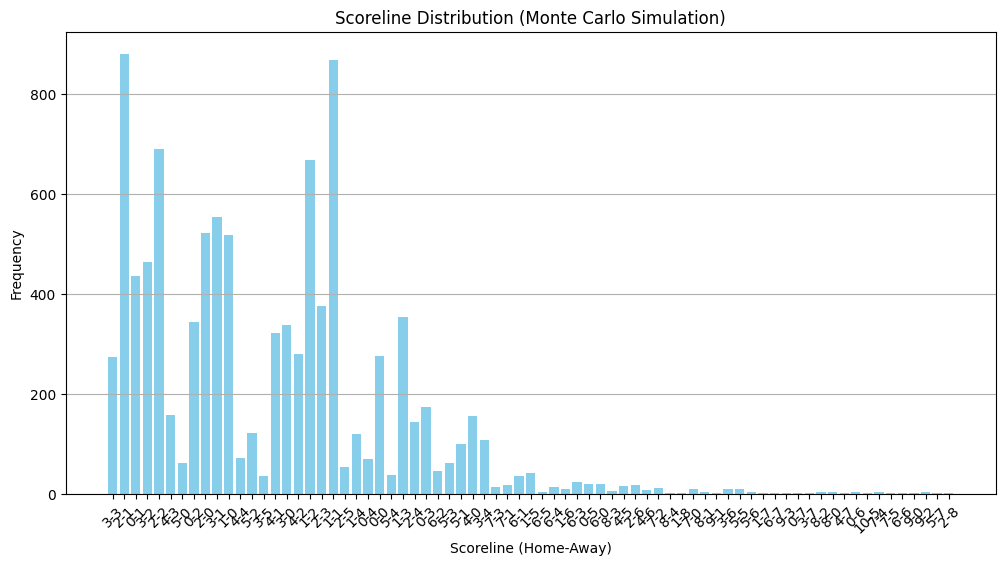

In [19]:
test_single_game_simulation("Manchester City", "Chelsea", 10000)

##### Case 2: Manchester City vs Ipswich Town
Comparing to case 1, examing a stronger team to a weaker team to check the functionality

Most common scoreline: (2, 1) with frequency 935
Average Home Goals: 2.3039
Average Away Goals: 1.2599
Manchester City won 6063 games; Ipswich Town won 1920 games; 2017 draws
Final scores: | Home : 20206 | Away: 7777 |


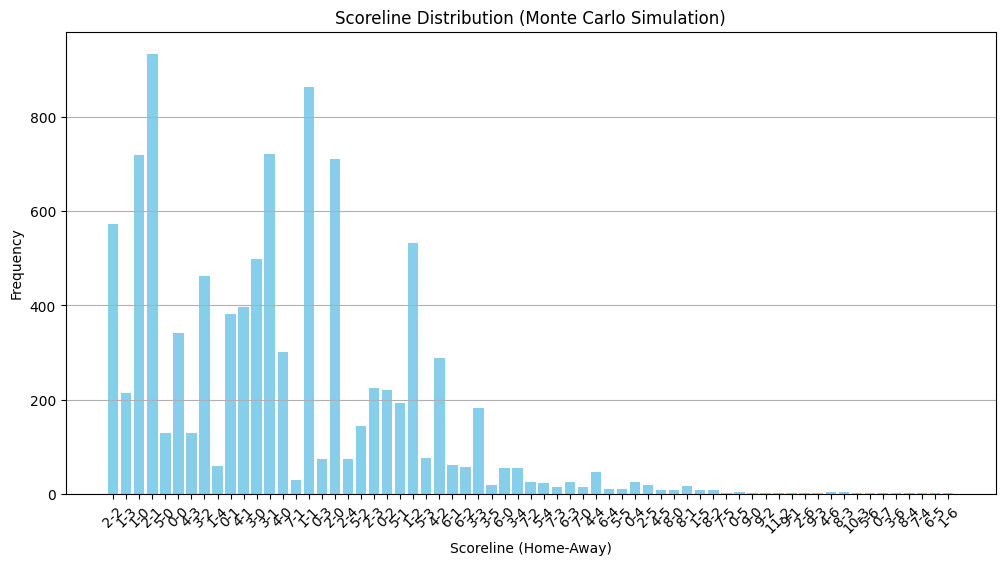

In [20]:
test_single_game_simulation("Manchester City", "Ipswich Town", 10000)

##### Case 3: Chelsea vs Manchester City
Comparing to case 1, examing the effect of being home and away team

Most common scoreline: (1, 2) with frequency 802
Average Home Goals: 1.783
Average Away Goals: 2.0975
Chelsea won 3320 games; Manchester City won 4496 games; 2184 draws
Final scores: | Home : 12144 | Away: 15672 |


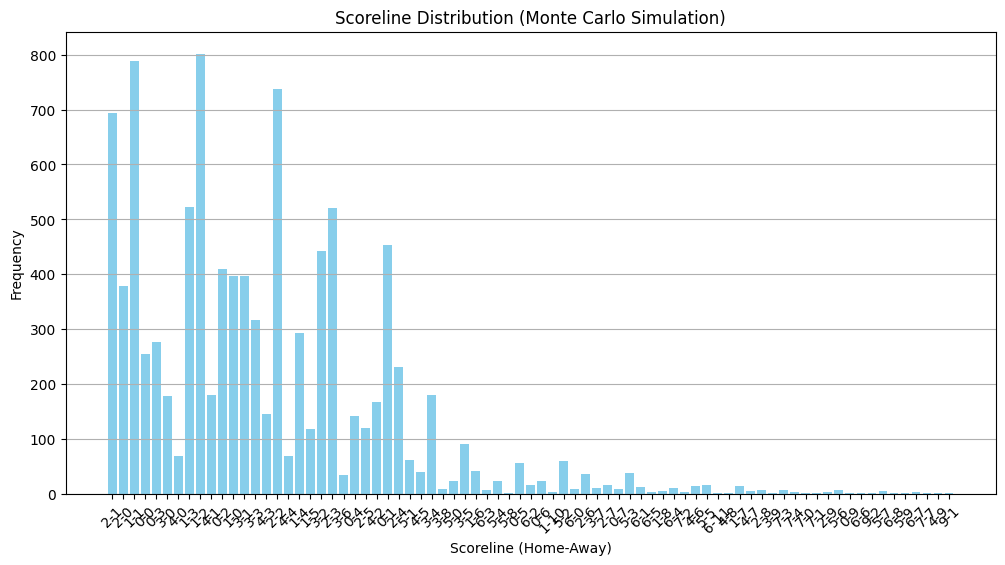

In [21]:
test_single_game_simulation("Chelsea", "Manchester City", 10000)

##### West Ham and Manchester City

Most common scoreline: (1, 1) with frequency 940
Average Home Goals: 1.2713
Average Away Goals: 2.1559
West Ham won 2173 games; Manchester City won 5682 games; 2145 draws
Final scores: | Home : 8664 | Away: 19191 |


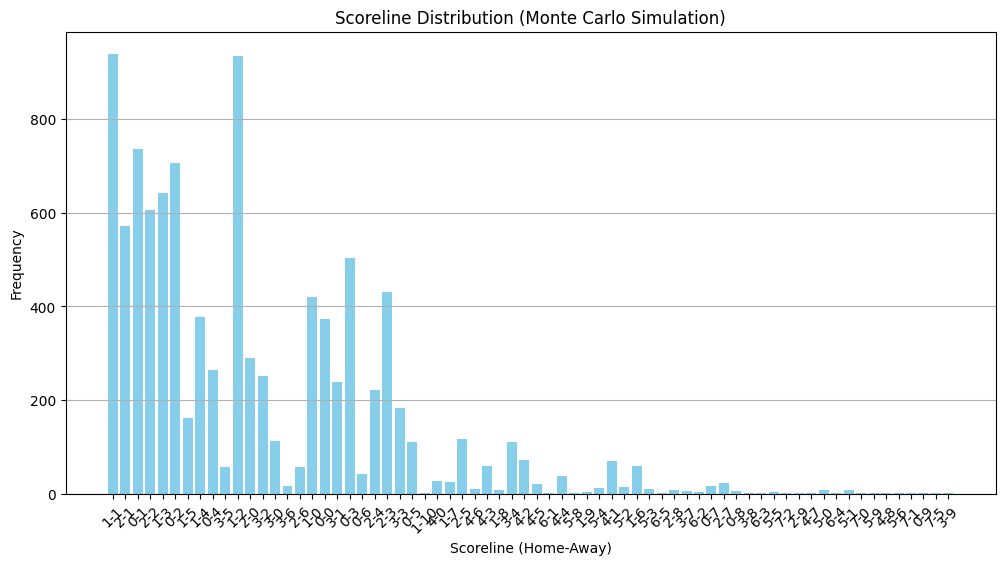

In [18]:
test_single_game_simulation("West Ham", "Manchester City", 10000)

Most common scoreline: (5, 2) with frequency 468
Average Home Goals: 5.3833
Average Away Goals: 2.1798
Bournemouth won 8684 games; Manchester City won 595 games; 721 draws
Final scores: | Home : 26773 | Away: 2506 |


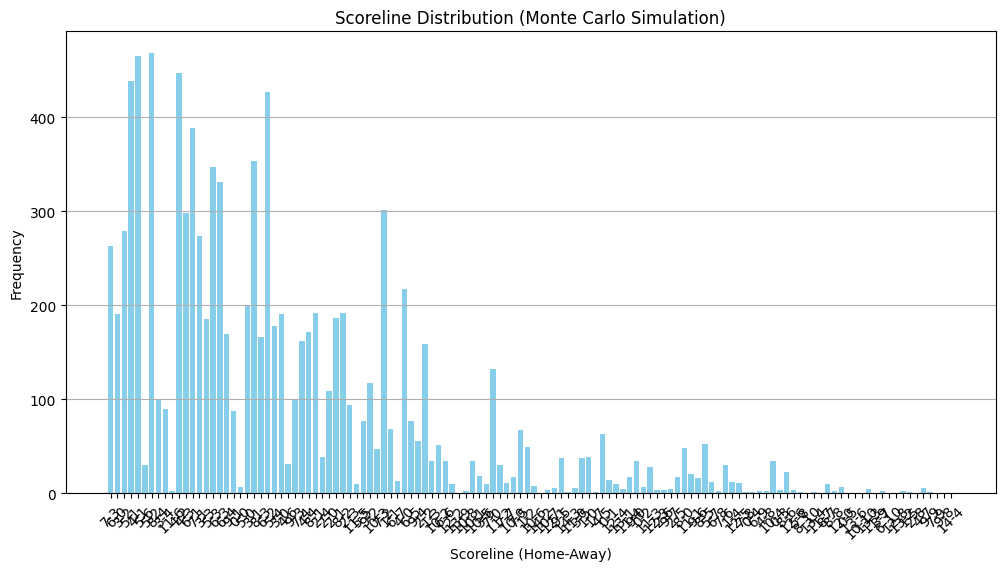

In [22]:
test_single_game_simulation("Bournemouth", "Manchester City", 10000)

----
### Final points prediction
The rules: 
20 teams playing each other home and away across the season, a total of 380 matches.
3 points for a win, 1 point for a draw, 0 point for defeat

Possible presentation data: 
- top 4 teams (qualifying for the next season's UEFA Champions League group stages)
- bottom 3 teams (relegating to the Championship)

In [ ]:
def test_one_season():
    """
    Generate the simulation for one season, return the score board
    
    Parameters: no parameter
    
    Returns: a dictionary with team name as key, their score and goals as value
    """
    
    # Initialize season standings
    league_table = {team: {
        "points": 0,
        "goals_scored": 0,
        "goals_conceded": 0,
        "matches_played": 0,
        "wins": 0,
        "draws": 0,
        "losses": 0
    } for team in teams}
    
    # Simulate matches for the entire season
    for home_team in teams:
        for away_team in teams:
            # Don't play against itself
            if home_team != away_team:
                # Simulate the match
                match_results = monte_carlo_match_simulation_parallel(home_team, away_team, n_simulations=1000)
                
                # Update team statistics
                home_stats = league_table[home_team]
                away_stats = league_table[away_team]
                
                # Update matches played
                home_stats["matches_played"] += 1
                away_stats["matches_played"] += 1
                
                # Update goals
                home_stats["goals_scored"] += match_results["average_home_goals"]
                home_stats["goals_conceded"] += match_results["average_away_goals"]
                away_stats["goals_scored"] += match_results["average_away_goals"]
                away_stats["goals_conceded"] += match_results["average_home_goals"]
                
                # Update points and match results
                if match_results["home_vic"] > match_results["away_vic"]:
                    home_stats["points"] += 3
                    home_stats["wins"] += 1
                    away_stats["losses"] += 1
                elif match_results["home_vic"] < match_results["away_vic"]:
                    away_stats["points"] += 3
                    away_stats["wins"] += 1
                    home_stats["losses"] += 1
                else:
                    home_stats["points"] += 1
                    away_stats["points"] += 1
                    home_stats["draws"] += 1
                    away_stats["draws"] += 1
    
    # Sort teams by points (and potentially goal difference in future iterations)
    sorted_teams = sorted(
        league_table.items(), 
        key=lambda x: x[1]["points"], 
        reverse=True
    )
    
    # Print league table for visualization
    print("League Table:")
    print("Team".ljust(20), "Points".ljust(10), "Played".ljust(10), "Wins".ljust(10), "Draws".ljust(10), "Losses".ljust(10), "Goals Scored".ljust(15), "Goals Conceded")
    for team, stats in sorted_teams:
        print(
            team.ljust(20), 
            str(stats["points"]).ljust(10), 
            str(stats["matches_played"]).ljust(10), 
            str(stats["wins"]).ljust(10), 
            str(stats["draws"]).ljust(10), 
            str(stats["losses"]).ljust(10), 
            str(round(stats["goals_scored"], 2)).ljust(15), 
            round(stats["goals_conceded"], 2)
        )
    
    return league_table

In [ ]:
def visualize_league_season(league_table):
    """
    Create comprehensive visualizations of the league season results.
    
    Parameters:
    league_table (dict): Dictionary containing team statistics from the season simulation
    
    Creates multiple plots to represent league performance:
    1. Points Distribution Bar Chart
    2. Goals Scored vs Goals Conceded Scatter Plot
    3. Team Performance Radar Chart
    """
    # Convert league table to a more plot-friendly format
    teams = list(league_table.keys())
    points = [stats['points'] for stats in league_table.values()]
    goals_scored = [stats['goals_scored'] for stats in league_table.values()]
    goals_conceded = [stats['goals_conceded'] for stats in league_table.values()]
    wins = [stats['wins'] for stats in league_table.values()]
    
    # Create a figure with subplots
    plt.figure(figsize=(15, 10))
    plt.suptitle('League Season Performance Analysis', fontsize=16)
    
    # 1. Points Distribution Bar Chart
    plt.subplot(2, 2, 1)
    plt.bar(teams, points, color='skyblue')
    plt.title('Points Distribution')
    plt.xlabel('Teams')
    plt.ylabel('Total Points')
    plt.xticks(rotation=45, ha='right')
    
    # 2. Goals Scored vs Goals Conceded Scatter Plot
    plt.subplot(2, 2, 2)
    plt.scatter(goals_scored, goals_conceded, c=points, cmap='viridis')
    plt.colorbar(label='Points')
    plt.title('Goals Scored vs Goals Conceded')
    plt.xlabel('Goals Scored')
    plt.ylabel('Goals Conceded')
    
    # Annotate each point with team names
    for i, team in enumerate(teams):
        plt.annotate(team, (goals_scored[i], goals_conceded[i]), 
                     xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # 3. Team Performance Radar Chart
    plt.subplot(2, 2, (3, 4), polar=True)
    
    # Normalize the data for radar chart
    def normalize(data):
        return (data - np.min(data)) / (np.max(data) - np.min(data))
    
    # Prepare data for radar chart
    performance_metrics = [
        normalize(points),
        normalize(goals_scored),
        normalize(goals_conceded),
        normalize(wins)
    ]
    
    # Number of variables
    categories = ['Points', 'Goals Scored', 'Goals Conceded', 'Wins']
    N = len(categories)
    
    # Create angles for radar chart
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    # Plot each team
    plt.title('Comprehensive Team Performance')
    for i, team in enumerate(teams):
        values = [metric[i] for metric in performance_metrics]
        values += values[:1]
        plt.polar(angles, values, marker='o', label=team)
    
    plt.thetagrids(np.degrees(angles[:-1]), categories)
    plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
    
    # Adjust layout and display
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


### Showing one season's results

In [ ]:
league_results = test_one_season()

KeyboardInterrupt: 

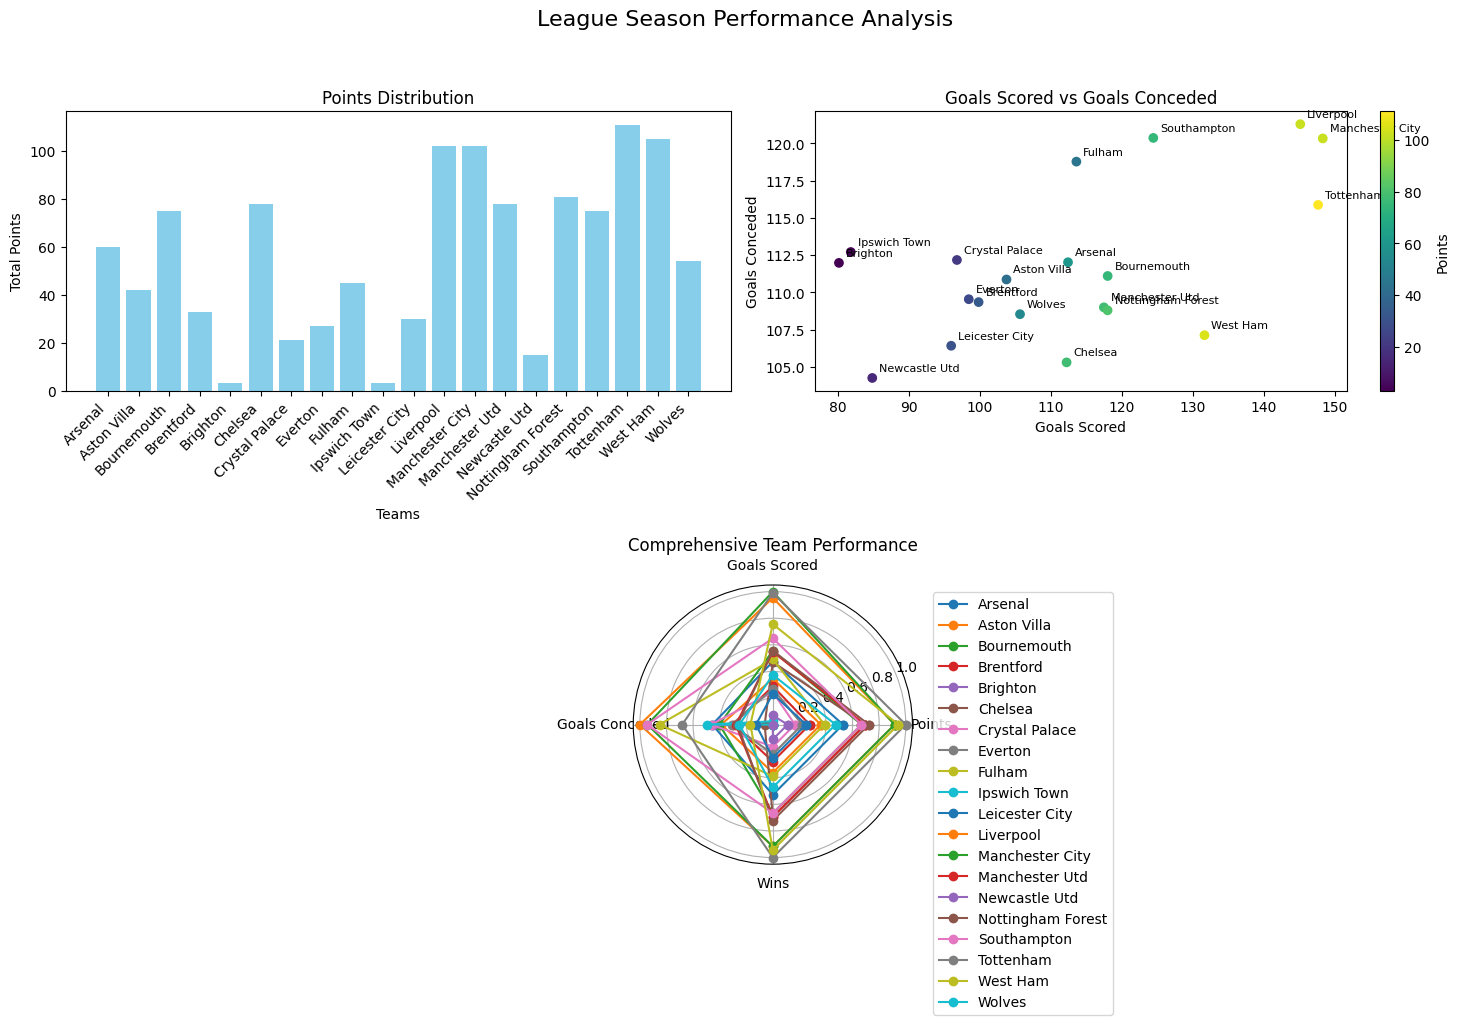

In [ ]:
visualize_league_season(league_results)